# Wind Farm Design for minimizing LCOE

In [ ]:
from matplotlib import pyplot as ppt

## Parameters

In [ ]:
N_TURB = 50 # -- number pf turbines (-)
PPT = 10 # -- power per turbine (MWh)
PAEP = N_TURB * PPT # -- gross annual energy production (MWh)
WFA = 1 # -- wind farm availability (0-1)
RD = 4.5 # -- rotor diameter (m)

In [ ]:
WL = 0.09
OL = 0 # -- other losses (MWh)
L = (1 - WFA) + WL + OL

In [ ]:
AEP = 0 # -- annual energy production (MWh) TBF
LCOE = 0 # -- levelized cost of energy (eur/MWh) TBF

Чтобы рассчитать грубую (gross) годовую выработку энергии для ветропарка из 50 турбин мощностью 10 МВт каждая, мы используем следующую формулу:

E(gross) = P(installed) * h(full-growth)
​

h(full-growth) — установленная мощность в МВт,

P(installed) — число эквивалентных часов полной нагрузки в году (Full Load Hours, FLH).

In [ ]:
CF = 0.5 # -- capacity factor (0-1)

GAEP = (PAEP * 365 * 24 * CF) / 1000 # -- gross annual energy production (MWh)
GAEP

2190.0

In [ ]:
AEP = (GAEP) * (1 - L)
print(AEP)

1992.9


In [ ]:
L = 2.75 * (RD)**(-1.75) # -- wake losses (MWh)
AEP = (GAEP) * (1 - L)
print(AEP)

1756.8334525766882


In [ ]:
RD_range = list(range(4, 13))

In [ ]:
AEP_range = []

for i in RD_range:
  WL = 2.75 * (i ** (-1.75))
  AEP_range.append(GAEP * (1 - WL))

In [ ]:
AEP_range

[1657.6811762880022,
 1829.770478603808,
 1928.1743921252396,
 1990.0804623913284,
 2031.7406668479532,
 2061.2188149557587,
 2082.9031225304057,
 2099.355885723297,
 2112.1587810563556]

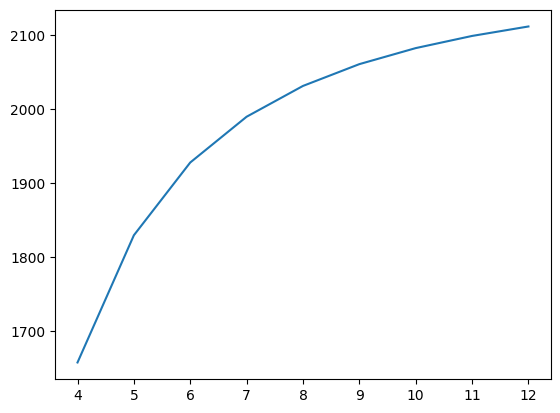

In [ ]:
ppt.plot(RD_range, AEP_range)
ppt.show()

In [ ]:
CAPEX = 3315
OPEX = 80

In [ ]:
EI = 0.117 * CAPEX
EC = 31.5 * RD * 1000000
EI

387.855

In [ ]:
FCR = 0.0578 # -- fixed charge rate ( )
BOS = 0 # -- balance of station cost (eur)
TCC = 0 # -- turbine capital cost (eur)
AOE = 0 # -- annual operating expenses (eur)

In [ ]:
LCOE = (FCR * (CAPEX) + OPEX) / AEP
LCOE

0.17623013698077633

In [ ]:
# LCOE = (FCR * (BOS + TCC) + AOE) / AEP
LCOE_range = []
CAPEX_range = []

for i in range(len(RD_range)):
  # Calculate the LCOE value first
  capex_value = CAPEX + 31.5 * RD_range[i]
  lcoe_value = ((FCR * capex_value) + OPEX) / AEP_range[i]
  # Then append it to the list
  LCOE_range.append(lcoe_value)
  CAPEX_range.append(capex_value)

In [ ]:
LCOE_range

[0.07576371717101521,
 0.0696332077109591,
 0.06702375486771114,
 0.0658537130918426,
 0.06539953152886505,
 0.0653475442891739,
 0.06554135251098658,
 0.06589496747110049,
 0.0663575527829886]

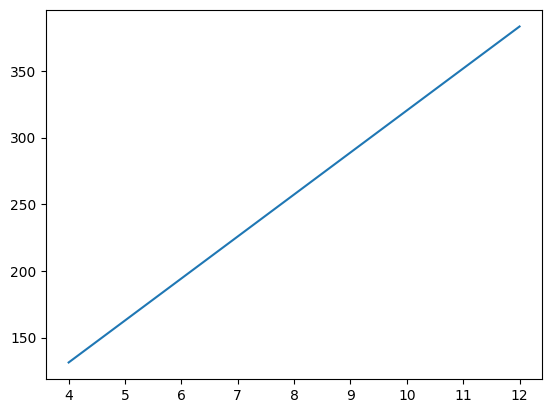

In [ ]:
ppt.plot(RD_range, CAPEX_range)
ppt.show()

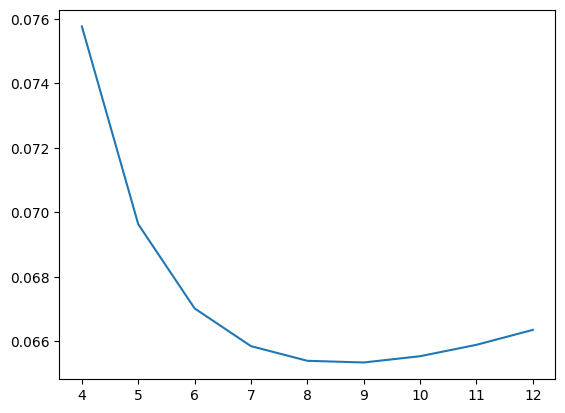

In [ ]:
ppt.plot(RD_range, LCOE_range)
ppt.show()